In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/OCDI_SR_RJM.csv')

In [ ]:
data.head(5)

,Unnamed: 0,research_consent,Phases,ocdi_id_participant,age,gender_allphases,Race,education_level,sexual_orientation,dsmiv_primary_diagnosis,...,docs1_cat3_admit,docs2_cat3_admit,docs3_cat3_admit,docs4_cat3_admit,docs5_cat3_admit,docs1_cat4_admit,docs2_cat4_admit,docs3_cat4_admit,docs4_cat4_admit,docs5_cat4_admit
0,70,1,3,OCAR_01786,24,Man,White,4.0,NaN,NaN,...,1.0,1.0,3.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0
1,84,1,3,OCAR_01778,34,Woman,White,7.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,90,1,3,OCAR_01858,19,Man,White,3.0,NaN,16.0,...,2.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0
3,102,1,3,OCAR_01780,19,Man,White,4.0,NaN,16.0,...,1.0,2.0,2.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0
4,110,1,3,OCAR_01773,34,Man,White,5.0,NaN,NaN,...,3.0,3.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.columns

Index(['Unnamed: 0', 'research_consent', 'Phases', 'ocdi_id_participant',
       'age', 'gender_allphases', 'Race', 'education_level',
       'sexual_orientation', 'dsmiv_primary_diagnosis',
       ...
       'docs1_cat3_admit', 'docs2_cat3_admit', 'docs3_cat3_admit',
       'docs4_cat3_admit', 'docs5_cat3_admit', 'docs1_cat4_admit',
       'docs2_cat4_admit', 'docs3_cat4_admit', 'docs4_cat4_admit',
       'docs5_cat4_admit'],
      dtype='object', length=133)

In [ ]:
col_names = [x.replace('_admit','').replace('_cmi','').replace('uestion','').replace('obq44','obq') for x in data.columns]

In [ ]:
demo_col = ['age','gender_allphases','Race','education_level','sexual_orientation']
dsm_col = [x for x in col_names if x.startswith('dsm')==True]
ybocs_col = [x for x in col_names if x.startswith('ybocs')==True]
obq_col = [x for x in col_names if x.startswith('obq')==True]
ocir_col = [x for x in col_names if x.startswith('ocir')==True]
docs_col = [x for x in col_names if x.startswith('docs')==True]

In [ ]:
obq_mapping = {'RT':[1,5,6,8,15,16,17,19,22,23,29,33,34,36,39,41],
               'PC':[2,3,4,9,10,11,12,14,18,20,25,26,31,37,40,43],
               'ICT':[7,13,21,24,27,28,30,32,35,38,42,44]}
ocir_mapping = {'Checking': [2,8,14],
                'Hoarding': [1,7,13],
                'Neutralising': [4,10,16],
                'Obsessing': [6,12,18],
                'Ordering': [3,9,15],
                'Washing': [5,11,17]}

In [ ]:
obq_label = []
for obq in obq_col:
  if obq.startswith('obq_q') == False:
    obq_label.append(obq)
  else:
    seq = int(obq.replace('obq_q',''))
    if seq in obq_mapping['RT']:
      label = obq+'_rt'
      obq_label.append(label)
    elif seq in obq_mapping['PC']:
      label = obq+'_pc'
      obq_label.append(label)
    elif seq in obq_mapping['ICT']:
      label = obq+'_ict'
      obq_label.append(label)

In [ ]:
ocir_label = []
for ocir in ocir_col:
  if ocir.endswith('total') == True:
    ocir_label.append(ocir)
  else:
    seq = int(ocir.replace('ocir_',''))
    if seq in ocir_mapping['Checking']:
      label = ocir+'_chk'
      ocir_label.append(label)
    elif seq in ocir_mapping['Hoarding']:
      label = ocir+'_hd'
      ocir_label.append(label)
    elif seq in ocir_mapping['Neutralising']:
      label = ocir+'_neut'
      ocir_label.append(label)
    elif seq in ocir_mapping['Obsessing']:
      label = ocir+'_obs'
      ocir_label.append(label)
    elif seq in ocir_mapping['Ordering']:
      label = ocir+'_ord'
      ocir_label.append(label)
    elif seq in ocir_mapping['Washing']:
      label = ocir+'_ws'
      ocir_label.append(label)

In [ ]:
docs_label = [x.replace('cat1','ctm').replace('cat2','rsp').replace('cat3','unacc').replace('cat4','right').replace('_total','') for x in docs_col]

In [ ]:
df = data.drop(columns=['Unnamed: 0', 'research_consent', 'Phases', 'ocdi_id_participant',])

In [ ]:
df.columns = demo_col + dsm_col + ybocs_col + obq_label + ocir_label + docs_label

In [ ]:
ocir_themes = ['chk','hd','neut','obs','ord','ws']
ocir_label_append = []
for theme in ocir_themes:
  col_name = 'ocir_'+theme
  ocir_label_append.append(col_name)
  df[col_name] = df.filter(items=[x for x in ocir_label if x.endswith(theme)]).sum(axis=1, numeric_only=True)

In [ ]:
ybocs_label_append = ['ybocs_obs','ybocs_comp']
ybocs_items = ybocs_col.copy()
ybocs_items.remove('ybocs_total')
df['ybocs_obs'] = df.filter(items=[x for x in ybocs_items if int(x[-1:])<6]).sum(axis=1, numeric_only=True)
df['ybocs_comp'] = df.filter(items=[x for x in ybocs_items if int(x[-1:])>=6]).sum(axis=1, numeric_only=True)

In [ ]:
docs_label_append = ['docs_total']
df['docs_total'] = df.filter(items=[x for x in docs_label if any(char.isdigit() for char in x) ==False]).sum(axis=1, numeric_only=True)

Correlation of Beliefs & Symptoms

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler

In [ ]:
int_col = ybocs_col + obq_label + ocir_label + docs_label + ocir_label_append + ybocs_label_append + docs_label_append
int_total_col = [x for x in int_col if x.endswith('total')==True]
int_theme_col = [x for x in int_col if x.endswith('total')==False and any(char.isdigit() for char in x) ==False]
int_item_col = [x for x in int_col if x.endswith('total')==False and any(char.isdigit() for char in x) ==True]

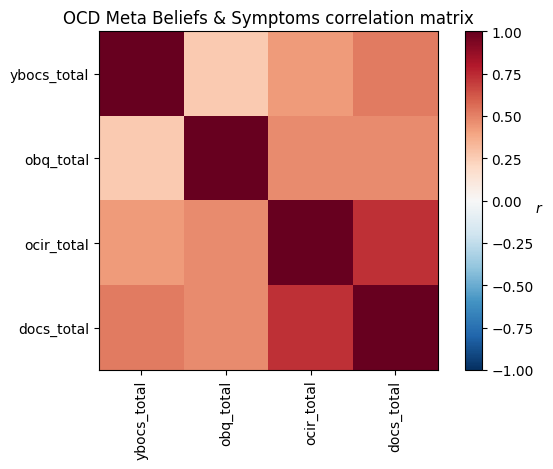

In [ ]:
X = StandardScaler().fit_transform(df[int_total_col])
ax = plt.axes()

im = ax.imshow(pd.DataFrame(X).corr(), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks(range(0,4))
ax.set_xticklabels(int_total_col, rotation=90)
ax.set_yticks(range(0,4))
ax.set_yticklabels(int_total_col)

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("OCD Meta Beliefs & Symptoms correlation matrix")
plt.tight_layout()

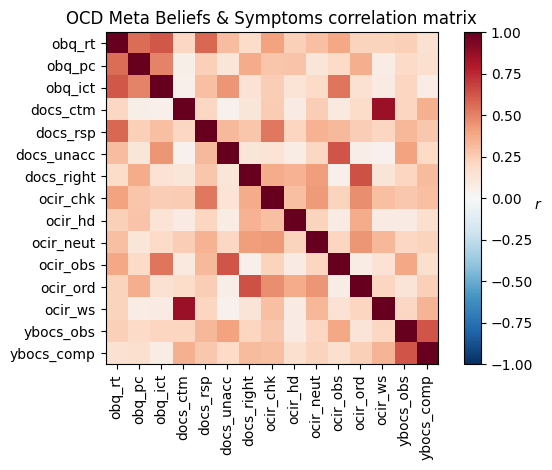

In [ ]:
X = StandardScaler().fit_transform(df[int_theme_col])
ax = plt.axes()

im = ax.imshow(pd.DataFrame(X).corr(), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks(range(0,15))
ax.set_xticklabels(int_theme_col, rotation=90)
ax.set_yticks(range(0,15))
ax.set_yticklabels(int_theme_col)

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("OCD Meta Beliefs & Symptoms correlation matrix")
plt.tight_layout()

PCA - sklearn

In [ ]:
df[int_theme_col].isna().sum()

obq_rt        0
obq_pc        0
obq_ict       0
docs_ctm      2
docs_rsp      3
docs_unacc    3
docs_right    4
ocir_chk      0
ocir_hd       0
ocir_neut     0
ocir_obs      0
ocir_ord      0
ocir_ws       0
ybocs_obs     0
ybocs_comp    0
dtype: int64

In [ ]:
X = StandardScaler().fit_transform(df[int_theme_col].fillna(0))
feature_names = df[int_theme_col].columns

In [ ]:
X.shape

(855, 15)

In [ ]:
nums = np.arange(16)

In [ ]:
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(X)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

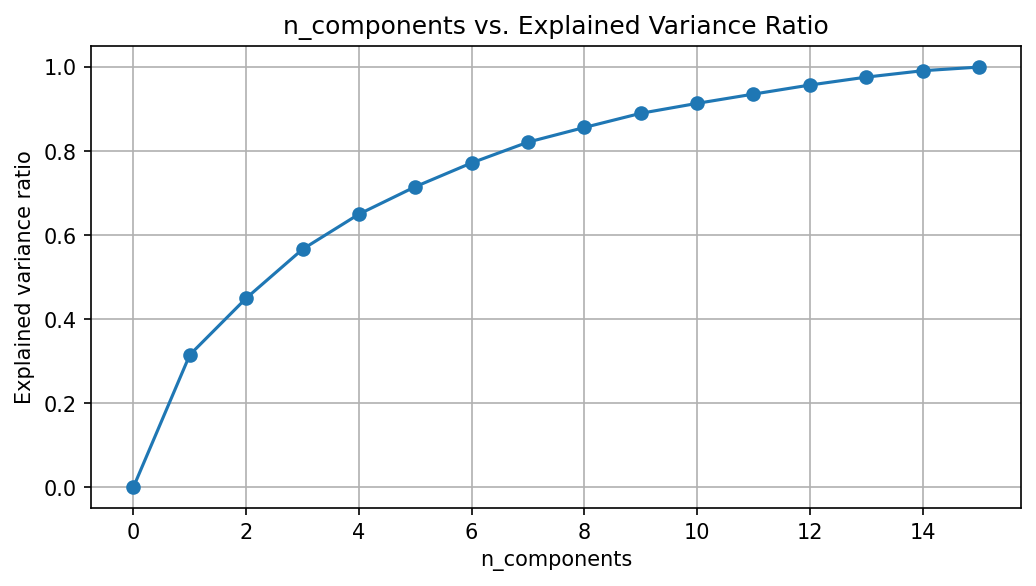

In [ ]:
plt.figure(figsize=(8,4),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [ ]:
# fit PCA with 6 components
pca = PCA(n_components=6)
l = len(X)
X_pca = pca.fit(X)

In [ ]:
X_pca.transform(X).shape

(855, 6)

In [ ]:
# get explained variance for each component
pca.explained_variance_ratio_

array([0.31488008, 0.13474841, 0.11661687, 0.08356492, 0.06531842,
       0.05675485])

In [ ]:
# total explained variance by all 5 components
sum(pca.explained_variance_ratio_)

0.7718835531483462

In [ ]:
# eigenvectors
X_pca.components_.T

array([[ 0.31874323, -0.23312032, -0.06039547,  0.36572298, -0.11184102,
         0.24382499],
       [ 0.25078608, -0.14488573, -0.29908103,  0.19951352, -0.53954136,
        -0.08232068],
       [ 0.26120738, -0.40289031, -0.03241519,  0.25306235, -0.11943579,
        -0.20358131],
       [ 0.20551968,  0.37793616,  0.38830538,  0.3230335 , -0.08826503,
        -0.15196059],
       [ 0.30773751, -0.07223551,  0.0129275 ,  0.03490298,  0.23922922,
         0.59408786],
       [ 0.22238276, -0.36859702,  0.2100522 , -0.23759768,  0.23592302,
        -0.27812872],
       [ 0.25689845,  0.20508513, -0.34845252, -0.26753382, -0.01380315,
        -0.23057748],
       [ 0.31190384,  0.13026049, -0.11564369,  0.03620848,  0.21385612,
         0.39763262],
       [ 0.19470184,  0.10055063, -0.32083734, -0.03877056, -0.07136928,
        -0.04694732],
       [ 0.27137061,  0.16535832, -0.07029367, -0.0315763 ,  0.51017369,
        -0.14370647],
       [ 0.24601099, -0.3822291 ,  0.2287211 , -0.

In [ ]:
# component matrix
# component (columns) loadings on all 15 variables (rows), can be seen as correlation
# component loadings = eigenvector * sqrt(eigenvalues)
X_pca.components_.T * np.sqrt(X_pca.explained_variance_)

array([[ 0.69312779, -0.33162075, -0.07992539,  0.40969815, -0.11076912,
         0.22510206],
       [ 0.54535058, -0.20610436, -0.39579409,  0.22350338, -0.53437034,
        -0.07599941],
       [ 0.56801236, -0.57312374, -0.04289721,  0.28349101, -0.1182911 ,
        -0.18794862],
       [ 0.44691586,  0.5376257 ,  0.51387069,  0.36187562, -0.08741909,
        -0.14029178],
       [ 0.66919514, -0.10275721,  0.01710784,  0.03909978,  0.23693643,
         0.5484688 ],
       [ 0.48358571, -0.5243405 ,  0.27797624, -0.26616685,  0.23366191,
        -0.25677166],
       [ 0.55864232,  0.29173984, -0.46113072, -0.29970256, -0.01367086,
        -0.21287181],
       [ 0.6782551 ,  0.18529951, -0.15303909,  0.04056226,  0.21180651,
         0.36709905],
       [ 0.42339176,  0.14303634, -0.42458568, -0.0434324 , -0.07068527,
        -0.04334231],
       [ 0.59011297,  0.23522725, -0.09302435, -0.0353731 ,  0.50528414,
        -0.13267148],
       [ 0.53496683, -0.54373253,  0.30268206, -0.

In [ ]:
x_comp = pd.DataFrame(X_pca.components_.T * np.sqrt(X_pca.explained_variance_))
x_comp['variable'] = feature_names
x_comp1 = pd.DataFrame(x_comp.set_index('variable'))
x_comp2 = x_comp1.apply(lambda x: np.where(x.where(x > -.4) < .4,'',round(x,2)))
x_comp2.sort_values([0,1], ascending=False)

,0,1,2,3,4,5
variable,,,,,,
obq_rt,0.69,,,0.41,,
ocir_chk,0.68,,,,,
docs_rsp,0.67,,,,,0.55
ocir_neut,0.59,,,,0.51,
ocir_ord,0.58,,-0.48,,,
obq_ict,0.57,-0.57,,,,
docs_right,0.56,,-0.46,,,
ybocs_obs,0.56,,,-0.52,,
obq_pc,0.55,,,,-0.53,


In [ ]:
pc_scores = pca.fit_transform(X)

PCA - factor_analyzer

In [ ]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=b1ac0356db42b041e6636fd3e7048120a97cf8eb8f53afb7a0db926e41a94c23
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
# unrotated factor loadings (validated the sklearn matrix)
fa = FactorAnalyzer(n_factors=6, rotation=None, method='principal')
fa.fit(X)
fa.loadings_

array([[ 0.69272233, -0.33142677, -0.07987864, -0.40945849,  0.11070433,
        -0.22497038],
       [ 0.54503156, -0.2059838 , -0.39556256, -0.22337264,  0.53405775,
         0.07595495],
       [ 0.56768009, -0.57278848, -0.04287212, -0.28332518,  0.11822191,
         0.18783868],
       [ 0.44665443,  0.5373112 ,  0.51357009, -0.36166393,  0.08736796,
         0.14020972],
       [ 0.66880368, -0.1026971 ,  0.01709783, -0.0390769 , -0.23679783,
        -0.54814796],
       [ 0.48330283, -0.52403377,  0.27781363,  0.26601115, -0.23352523,
         0.25662146],
       [ 0.55831553,  0.29156918, -0.46086097,  0.29952724,  0.01366286,
         0.21274728],
       [ 0.67785834,  0.18519112, -0.15294957, -0.04053853, -0.21168261,
        -0.36688431],
       [ 0.42314409,  0.14295267, -0.42433731,  0.04340699,  0.07064392,
         0.04331695],
       [ 0.58976777,  0.23508965, -0.09296993,  0.0353524 , -0.50498856,
         0.13259387],
       [ 0.53465389, -0.54341447,  0.302505  ,  0.

In [ ]:
# rotated with varimax method
fa = FactorAnalyzer(n_factors=6, rotation='varimax', method='principal')
fa.fit(X)

FactorAnalyzer(method='principal', n_factors=6, rotation='varimax',
               rotation_kwargs={})

In [ ]:
x_comp = pd.DataFrame(fa.loadings_)
x_comp['variable'] = feature_names
x_comp1 = pd.DataFrame(x_comp.set_index('variable'))
x_comp2 = x_comp1.apply(lambda x: np.where(x.where(x > -.4) < .4,'',round(x,2)))
x_comp2.sort_values([0,1], ascending=False)

,0,1,2,3,4,5
variable,,,,,,
docs_rsp,0.84,,,,,
ocir_chk,0.69,,,,,
obq_rt,0.52,,,,0.67,
docs_unacc,,0.85,,,,
ocir_obs,,0.84,,,,
obq_ict,,0.57,,,0.66,
obq_pc,,,,,0.84,
docs_ctm,,,,,,0.93
docs_right,,,0.83,,,


In [ ]:
pc_scores_rotated = fa.transform(X)

Factor Analysis

In [ ]:
# 6 factors
fa = FactorAnalysis(n_components=6)
l = len(X)
X_fa = fa.fit(X)

In [ ]:
# unrotated factors
x_comp = pd.DataFrame(fa.components_.T)
x_comp['variable'] = feature_names
x_comp1 = pd.DataFrame(x_comp.set_index('variable'))
x_comp2 = x_comp1.apply(lambda x: np.where(x.where(x > -.4) < .4,'',round(x,2)))
x_comp2.sort_values([0,1], ascending=False)

,0,1,2,3,4,5
variable,,,,,,
ocir_ws,0.94,,,,,
docs_ctm,0.85,,,,,
ybocs_comp,0.45,,,-0.56,,
ocir_chk,0.43,-0.4,,,,
ocir_neut,0.42,,,,,
obq_rt,,-0.68,,,,
obq_ict,,-0.65,,,,
obq_pc,,-0.58,,,,
docs_rsp,,-0.54,,,,0.47


In [ ]:
# 6 factors
fa = FactorAnalysis(n_components=6,rotation ='varimax')
l = len(X)
X_fa = fa.fit(X)

In [ ]:
# rotated factors
x_comp = pd.DataFrame(fa.components_.T)
x_comp['variable'] = feature_names
x_comp1 = pd.DataFrame(x_comp.set_index('variable'))
x_comp2 = x_comp1.apply(lambda x: np.where(x.where(x > -.4) < .4,'',round(x,2)))
x_comp2.sort_values([0,1], ascending=False)

,0,1,2,3,4,5
variable,,,,,,
ocir_ws,0.96,,,,,
docs_ctm,0.87,,,,,
obq_pc,,-0.75,,,,
obq_rt,,-0.72,,,,0.46
obq_ict,,-0.63,,,-0.51,
docs_rsp,,,,,,0.72
docs_unacc,,,,,-0.7,
docs_right,,,0.74,,,
ocir_chk,,,0.42,,,0.46


Clustering - KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [ ]:
pc_df = pd.DataFrame(pc_scores_rotated,columns = ['pc0','pc1','pc2','pc3','pc4','pc5'])
pc_df.describe().round(2)

,pc0,pc1,pc2,pc3,pc4,pc5
count,855.00,855.00,855.00,855.00,855.00,855.00
mean,0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.22,-2.60,-1.82,-4.65,-3.28,-1.82
25%,-0.78,-0.81,-0.82,-0.61,-0.71,-0.83
50%,-0.10,0.09,-0.14,0.05,0.07,-0.29
75%,0.72,0.81,0.65,0.69,0.71,0.82
max,2.69,2.45,3.42,2.75,2.50,2.31


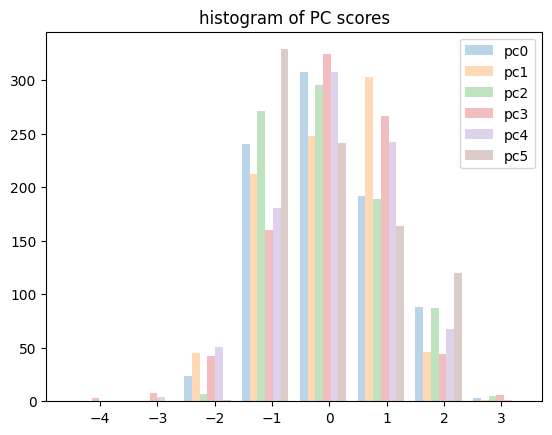

In [ ]:
plt.hist(pc_df, bins=8, alpha=0.3)
plt.title("histogram of PC scores")
plt.legend(['pc0','pc1','pc2','pc3','pc4','pc5'])
plt.show()

In [ ]:
pc_df.isnull().sum()

pc0    0
pc1    0
pc2    0
pc3    0
pc4    0
pc5    0
dtype: int64

Using PC as input

In [ ]:
# Find optimal K (Elbow Method)
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
 }

# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans_pca = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans_pca.fit(pc_scores)
    sse.append(kmeans_pca.inertia_)

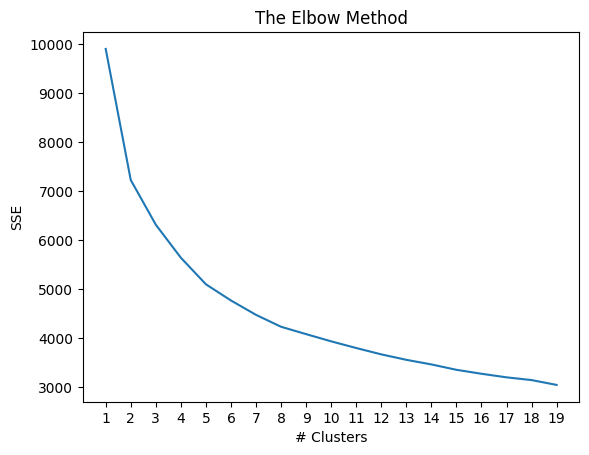

In [ ]:
plt.plot(range(1,20), sse)
plt.xticks(range(1, 20))
plt.title('The Elbow Method')
plt.xlabel('# Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# Implement the model with K = 2,5
kmeans_2cluster = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans_2cluster.fit(pc_scores)
kmeans_5cluster = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans_5cluster.fit(pc_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
# Create a new dataframe with the original features and add assigned clusters
df_seg2 = df.copy()
df_seg2['segment'] = kmeans_2cluster.labels_
df_seg5 = df.copy()
df_seg5['segment'] = kmeans_5cluster.labels_

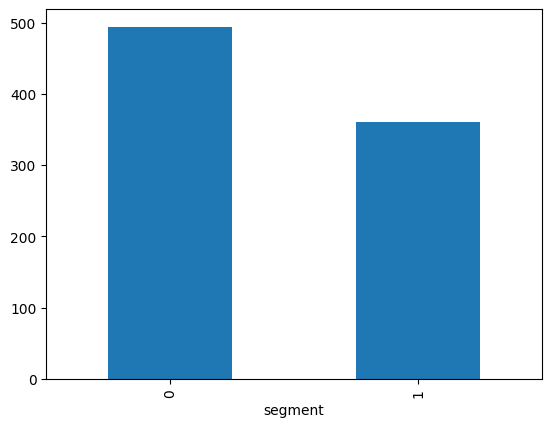

In [ ]:
df_seg2['segment'].value_counts().sort_index().plot(kind='bar');

In [ ]:
df_seg5['segment'].value_counts()

segment
3    197
4    187
2    169
0    158
1    144
Name: count, dtype: int64

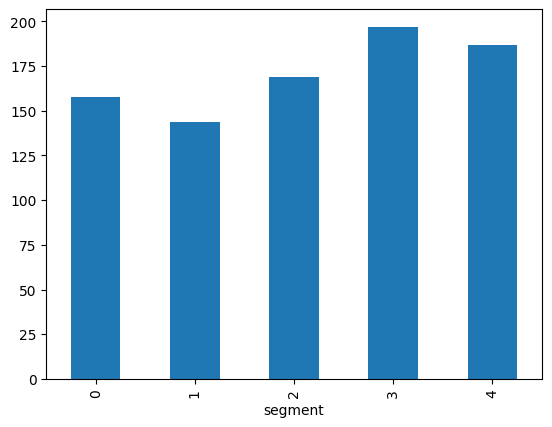

In [ ]:
df_seg5['segment'].value_counts().sort_index().plot(kind='bar');

In [ ]:
df_seg2[int_theme_col+['segment']].groupby('segment').mean().T.style.format('{:,.1f}').background_gradient(low=0, high=3,cmap='rocket_r', axis = 1)

segment,0,1
obq_rt,54.0,81.7
obq_pc,64.9,84.2
obq_ict,33.1,49.4
docs_ctm,4.5,8.9
docs_rsp,4.2,11.3
docs_unacc,7.4,12.1
docs_right,3.9,9.4
ocir_chk,2.3,5.9
ocir_hd,1.9,4.3
ocir_neut,1.5,5.0


In [ ]:
output = df_seg5[int_theme_col+['segment']].groupby('segment').median().T
output.style.format('{:,.1f}').background_gradient(low=0, high=3,cmap='rocket_r', axis = 1)

segment,0,1,2,3,4
obq_rt,60.0,60.5,45.0,71.0,90.0
obq_pc,85.0,65.0,55.0,75.0,90.0
obq_ict,32.0,31.0,24.0,50.0,54.0
docs_ctm,2.0,15.0,0.0,0.0,12.0
docs_rsp,5.5,4.0,0.0,6.5,14.0
docs_unacc,6.0,7.0,4.0,14.0,15.0
docs_right,11.0,3.0,1.0,1.0,12.0
ocir_chk,4.0,3.0,1.0,3.0,7.0
ocir_hd,4.0,1.0,1.0,1.0,4.0
ocir_neut,2.0,2.0,0.0,1.0,7.0


In [ ]:
df_seg5_pc = df_seg5.join(pd.DataFrame(pc_scores_rotated,columns = ['pc0','pc1','pc2','pc3','pc4','pc5']))

In [ ]:
df_seg5_pc.groupby('segment')[['pc0','pc1','pc2','pc3','pc4','pc5']].mean().T.style.format('{:,.1f}').background_gradient(low=0, high=3,cmap='rocket_r', axis = 1)

segment,0,1,2,3,4
pc0,-0.2,-0.3,-0.3,-0.1,0.8
pc1,-0.7,-0.3,-0.6,0.8,0.6
pc2,0.8,-0.5,-0.5,-0.7,0.8
pc3,0.2,0.4,-0.9,0.2,0.1
pc4,0.1,-0.3,-0.5,0.2,0.4
pc5,-0.6,1.4,-0.4,-0.7,0.5


In [ ]:
output = df_seg5[int_theme_col+['segment']].groupby('segment').median().T
output.style.format('{:,.1f}').background_gradient(low=0, high=3,cmap='rocket_r', axis = 1)

segment,0,1,2,3,4
obq_rt,60.0,60.5,45.0,71.0,90.0
obq_pc,85.0,65.0,55.0,75.0,90.0
obq_ict,32.0,31.0,24.0,50.0,54.0
docs_ctm,2.0,15.0,0.0,0.0,12.0
docs_rsp,5.5,4.0,0.0,6.5,14.0
docs_unacc,6.0,7.0,4.0,14.0,15.0
docs_right,11.0,3.0,1.0,1.0,12.0
ocir_chk,4.0,3.0,1.0,3.0,7.0
ocir_hd,4.0,1.0,1.0,1.0,4.0
ocir_neut,2.0,2.0,0.0,1.0,7.0


In [ ]:
df_seg5_pc['segment'] = df_seg5_pc['segment'].apply(lambda x: np.where(x==0,'C0 - exterior control',
                                                        np.where(x==1,'C1 - contamination/washing',
                                                        np.where(x==2,'C2 - sub-clinical',
                                                        np.where(x==3,'C3 - interior control', 'C4 - mixed symptoms'
                                                        )))))

Distribution of PC Score by Segment

In [ ]:
sorted(list(df_seg5_pc['segment'].unique()))

['C0 - exterior control',
 'C1 - contamination/washing',
 'C2 - sub-clinical',
 'C3 - interior control',
 'C4 - mixed symptoms']

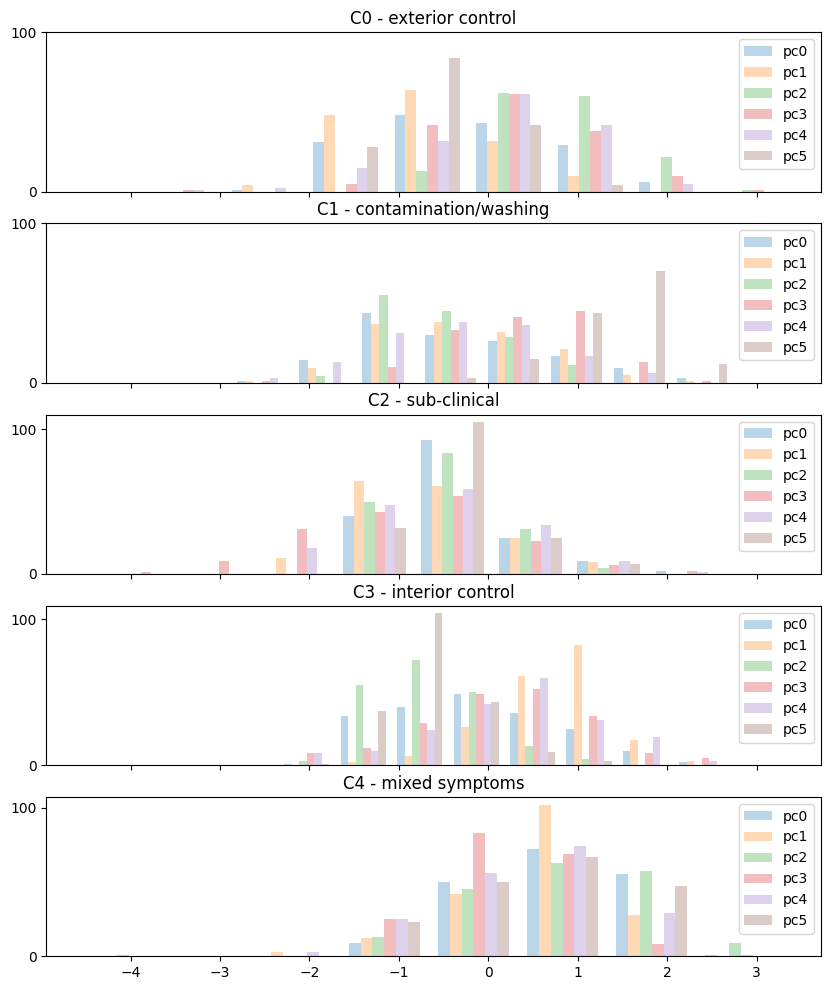

In [ ]:
segments = sorted(list(df_seg5_pc['segment'].unique()))
fig, axes = plt.subplots(nrows=len(segments), figsize=(10, 12), sharex=True)
for ax, segment in zip(axes,segments):
  seg= df_seg5_pc[df_seg5_pc['segment']==segment][['pc0','pc1','pc2','pc3','pc4','pc5']]
  ax.hist(seg, bins=8, alpha=0.3)
  ax.set_title(str(segment))
  ax.set_yticks([0, 100])
  ax.legend(['pc0','pc1','pc2','pc3','pc4','pc5'])
plt.show()

Profile analysis

In [ ]:
df_seg5[demo_col].isnull().sum()

age                     0
gender_allphases        0
Race                    0
education_level         1
sexual_orientation    467
dtype: int64

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

Age

In [ ]:
df_seg5[['age']+['segment']].groupby('segment').median().T.style.format('{:,.2f}').background_gradient(low=0, high=3,cmap='rocket_r', axis = 1)

segment,0,1,2,3,4
age,25.00,26.00,26.00,26.00,26.00


In [ ]:
frame = df_seg5[['segment','age']].copy()

In [ ]:
model = ols('age ~ segment',                 # Model formula
            data = frame).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                 sum_sq     df         F    PR(>F)
segment        0.076810    1.0  0.000579  0.980811
Residual  113189.693951  853.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.7949,0.9751,-2.8286,4.4184,False
0,2,2.4344,0.3116,-1.046,5.9149,False
0,3,0.9872,0.9296,-2.3716,4.346,False
0,4,0.0059,1.0,-3.3927,3.4045,False
1,2,1.6395,0.7179,-1.9273,5.2063,False
1,3,0.1923,0.9999,-3.256,3.6405,False
1,4,-0.789,0.9721,-4.276,2.6979,False
2,3,-1.4472,0.7516,-4.7448,1.8504,False
2,4,-2.4285,0.2723,-5.7666,0.9095,False
3,4,-0.9813,0.9196,-4.1924,2.2297,False


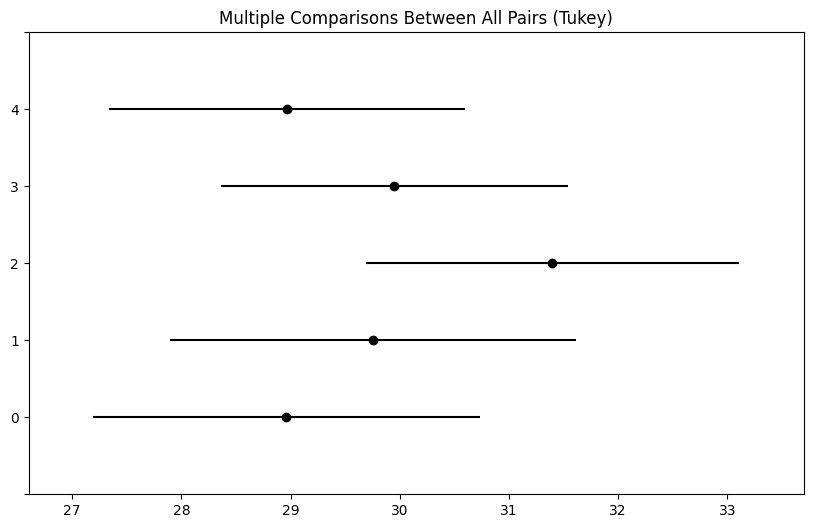

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=frame['age'],     # Data
                          groups=frame['segment'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

Gender

In [ ]:
pd.DataFrame(df_seg5[df_seg5['gender_allphases']=='Woman'].groupby('segment')['gender_allphases'].count()/df_seg5.groupby('segment')['gender_allphases'].count()).T.style.format('{:,.2f}').background_gradient(low=0, high=3,cmap='rocket_r', axis = 1)

segment,0,1,2,3,4
gender_allphases,0.53,0.57,0.33,0.44,0.60


In [ ]:
df_seg5['is_woman'] = df_seg5['gender_allphases'].apply(lambda x: np.where(x=='Woman',1,0))
frame = df_seg5[['segment','is_woman']].copy()

In [ ]:
model = ols('is_woman ~ segment',                 # Model formula
            data = frame).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

              sum_sq     df         F    PR(>F)
segment     0.035043    1.0  0.139937  0.708436
Residual  213.609401  853.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0441,0.9365,-0.1106,0.1989,False
0,2,-0.1999,0.0023,-0.3485,-0.0512,True
0,3,-0.0888,0.4396,-0.2322,0.0547,False
0,4,0.0736,0.6365,-0.0715,0.2187,False
1,2,-0.244,0.0001,-0.3963,-0.0917,True
1,3,-0.1329,0.0992,-0.2801,0.0144,False
1,4,0.0295,0.983,-0.1194,0.1784,False
2,3,0.1111,0.1974,-0.0297,0.2519,False
2,4,0.2735,0.0,0.1309,0.416,True
3,4,0.1624,0.011,0.0253,0.2995,True


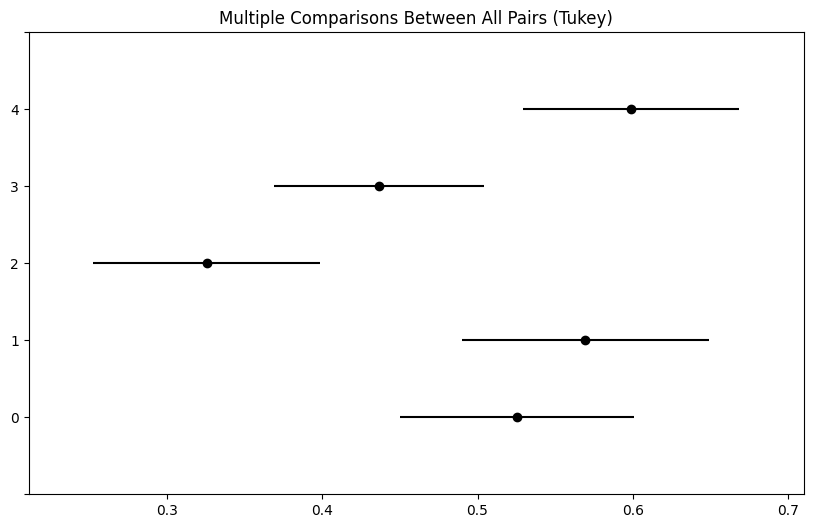

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=frame['is_woman'],     # Data
                          groups=frame['segment'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

Race (White)

In [ ]:
pd.DataFrame(df_seg5[df_seg5['Race']=='White'].groupby('segment')['Race'].count()/df_seg5.groupby('segment')['Race'].count()).T.style.format('{:,.2f}').background_gradient(low=0, high=3,cmap='rocket_r', axis = 1)

segment,0,1,2,3,4
Race,0.85,0.81,0.83,0.90,0.86


In [ ]:
df_seg5['is_white'] = df_seg5['Race'].apply(lambda x: np.where(x=='White',1,0))
frame = df_seg5[['segment','is_white']].copy()

In [ ]:
model = ols('is_white ~ segment',                 # Model formula
            data = frame).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

              sum_sq     df         F    PR(>F)
segment     0.176549    1.0  1.404095  0.236369
Residual  107.255030  853.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.0356,0.9071,-0.1472,0.076,False
0,2,-0.0138,0.9967,-0.121,0.0934,False
0,3,0.0504,0.6718,-0.0531,0.1538,False
0,4,0.0075,0.9997,-0.0972,0.1122,False
1,2,0.0218,0.9828,-0.088,0.1317,False
1,3,0.086,0.1758,-0.0202,0.1922,False
1,4,0.0431,0.8079,-0.0643,0.1505,False
2,3,0.0642,0.4179,-0.0374,0.1657,False
2,4,0.0213,0.9799,-0.0815,0.1241,False
3,4,-0.0429,0.7602,-0.1418,0.056,False


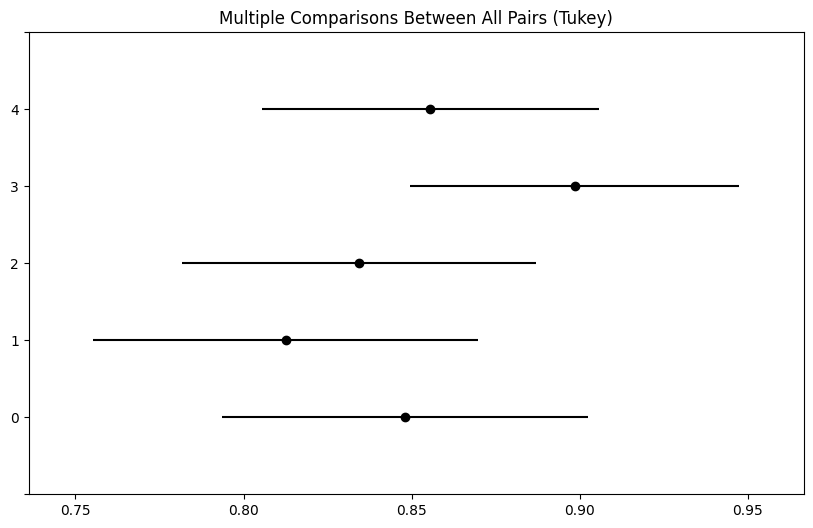

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=frame['is_white'],     # Data
                          groups=frame['segment'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

Education (High)

In [ ]:
pd.DataFrame(df_seg5[df_seg5['education_level']>5].groupby('segment')['education_level'].count()/df_seg5.groupby('segment')['education_level'].count()).T.style.format('{:,.2f}').background_gradient(low=0, high=3,cmap='rocket_r', axis = 1)

segment,0,1,2,3,4
education_level,0.17,0.21,0.20,0.23,0.18


In [ ]:
df_seg5['is_high_ed'] = df_seg5['education_level'].apply(lambda x: np.where(x>5,1,0))
frame = df_seg5[['segment','is_high_ed']].copy()

In [ ]:
model = ols('is_high_ed ~ segment',                 # Model formula
            data = frame).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

              sum_sq     df         F   PR(>F)
segment     0.015001    1.0  0.094377  0.75876
Residual  135.580321  853.0       NaN      NaN


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0374,0.926,-0.0882,0.1631,False
0,2,0.0303,0.9594,-0.0903,0.1509,False
0,3,0.0575,0.6592,-0.0589,0.174,False
0,4,0.0056,0.9999,-0.1122,0.1234,False
1,2,-0.0071,0.9999,-0.1308,0.1165,False
1,3,0.0201,0.9908,-0.0994,0.1396,False
1,4,-0.0319,0.9518,-0.1527,0.089,False
2,3,0.0272,0.9664,-0.0871,0.1416,False
2,4,-0.0247,0.9775,-0.1404,0.091,False
3,4,-0.052,0.7061,-0.1633,0.0594,False


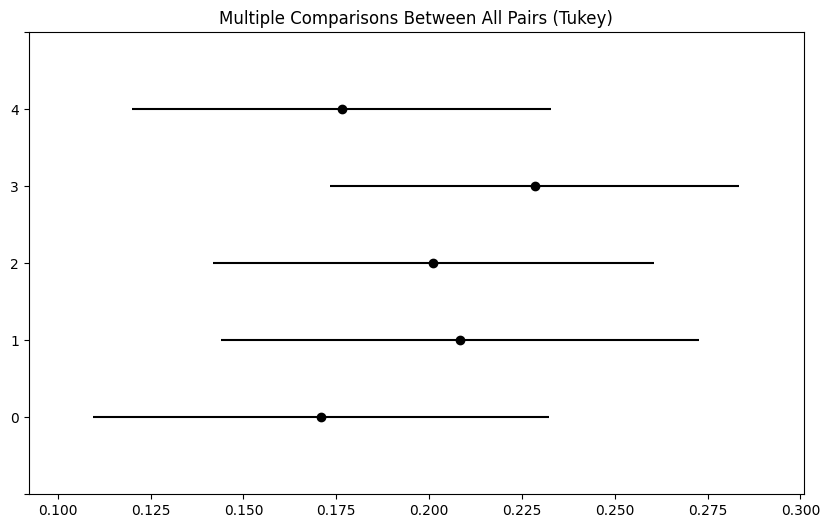

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=frame['is_high_ed'],     # Data
                          groups=frame['segment'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

Sexuality

In [ ]:
pd.DataFrame(df_seg5[df_seg5['sexual_orientation']=='Heterosexual'].groupby('segment')['sexual_orientation'].count()/df_seg5.groupby('segment')['sexual_orientation'].count()).T.style.format('{:,.2f}').background_gradient(low=0, high=3,cmap='rocket_r', axis = 1)

segment,0,1,2,3,4
sexual_orientation,0.77,0.82,0.84,0.74,0.71


In [ ]:
df_seg5['is_hetero'] = df_seg5['sexual_orientation'].apply(lambda x: np.where(x=='Heterosexual',1,0))
frame = df_seg5[['segment','is_hetero']].copy()

In [ ]:
model = ols('is_hetero ~ segment',                 # Model formula
            data = frame).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

              sum_sq     df         F    PR(>F)
segment     0.022397    1.0  0.098268  0.753995
Residual  194.415030  853.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0845,0.5389,-0.0658,0.2348,False
0,2,0.0931,0.3964,-0.0513,0.2374,False
0,3,0.0477,0.8828,-0.0916,0.187,False
0,4,0.0394,0.9406,-0.1015,0.1804,False
1,2,0.0086,0.9999,-0.1393,0.1565,False
1,3,-0.0368,0.9559,-0.1798,0.1062,False
1,4,-0.045,0.9142,-0.1897,0.0996,False
2,3,-0.0454,0.8944,-0.1821,0.0914,False
2,4,-0.0536,0.8274,-0.1921,0.0848,False
3,4,-0.0083,0.9998,-0.1415,0.1249,False


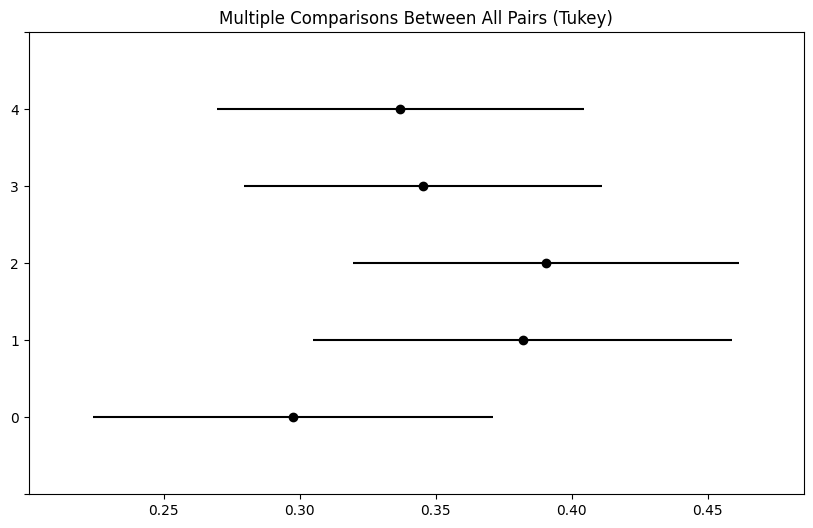

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=frame['is_hetero'],     # Data
                          groups=frame['segment'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

Clustering - Gaussian Mixture Models